In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="LSTM seq 128.", name="epoch 500")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.LSTM(128, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=500, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
Total params: 70,297
Trainable params: 70,297
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/500
4/5 [=======================>......] - ETA: 0s - loss: 1.2730 - mae: 1.0430 

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 10s 1s/step - loss: 1.2621 - mae: 1.0356 - val_loss: 0.8777 - val_mae: 0.8375
Epoch 2/500
5/5 [==============================] - ETA: 0s - loss: 0.6272 - mae: 0.6655

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 987ms/step - loss: 0.6272 - mae: 0.6655 - val_loss: 0.3151 - val_mae: 0.4473
Epoch 3/500
5/5 [==============================] - ETA: 0s - loss: 0.2766 - mae: 0.4263

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 954ms/step - loss: 0.2766 - mae: 0.4263 - val_loss: 0.2002 - val_mae: 0.3669
Epoch 4/500
3/5 [=================>............] - ETA: 0s - loss: 0.1945 - mae: 0.3652

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 993ms/step - loss: 0.1827 - mae: 0.3517 - val_loss: 0.1853 - val_mae: 0.3547
Epoch 5/500
4/5 [=======================>......] - ETA: 0s - loss: 0.1886 - mae: 0.3550

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 936ms/step - loss: 0.1870 - mae: 0.3537 - val_loss: 0.1754 - val_mae: 0.3450
Epoch 6/500
5/5 [==============================] - ETA: 0s - loss: 0.1730 - mae: 0.3426

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 950ms/step - loss: 0.1730 - mae: 0.3426 - val_loss: 0.1603 - val_mae: 0.3320
Epoch 7/500
5/5 [==============================] - ETA: 0s - loss: 0.1613 - mae: 0.3315

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 937ms/step - loss: 0.1613 - mae: 0.3315 - val_loss: 0.1511 - val_mae: 0.3219
Epoch 8/500
5/5 [==============================] - ETA: 0s - loss: 0.1500 - mae: 0.3185

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 907ms/step - loss: 0.1500 - mae: 0.3185 - val_loss: 0.1385 - val_mae: 0.3103
Epoch 9/500
5/5 [==============================] - ETA: 0s - loss: 0.1361 - mae: 0.3035

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.1361 - mae: 0.3035 - val_loss: 0.1198 - val_mae: 0.2865
Epoch 10/500
3/5 [=================>............] - ETA: 0s - loss: 0.1202 - mae: 0.2827

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 943ms/step - loss: 0.1140 - mae: 0.2741 - val_loss: 0.0905 - val_mae: 0.2425
Epoch 11/500
3/5 [=================>............] - ETA: 0s - loss: 0.0855 - mae: 0.2324

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 910ms/step - loss: 0.0819 - mae: 0.2269 - val_loss: 0.0633 - val_mae: 0.1988
Epoch 12/500
5/5 [==============================] - 1s 130ms/step - loss: 0.0694 - mae: 0.2071 - val_loss: 0.0674 - val_mae: 0.2048
Epoch 13/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0651 - mae: 0.1998

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 894ms/step - loss: 0.0658 - mae: 0.2007 - val_loss: 0.0594 - val_mae: 0.1904
Epoch 14/500
5/5 [==============================] - 0s 77ms/step - loss: 0.0627 - mae: 0.1940 - val_loss: 0.0594 - val_mae: 0.1897
Epoch 15/500
5/5 [==============================] - 0s 55ms/step - loss: 0.0609 - mae: 0.1902 - val_loss: 0.0603 - val_mae: 0.1912
Epoch 16/500
5/5 [==============================] - ETA: 0s - loss: 0.0593 - mae: 0.1861

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 902ms/step - loss: 0.0593 - mae: 0.1861 - val_loss: 0.0574 - val_mae: 0.1842
Epoch 17/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0573 - mae: 0.1838

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0577 - mae: 0.1844 - val_loss: 0.0569 - val_mae: 0.1826
Epoch 18/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0575 - mae: 0.1839

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 946ms/step - loss: 0.0571 - mae: 0.1834 - val_loss: 0.0563 - val_mae: 0.1819
Epoch 19/500
5/5 [==============================] - 0s 69ms/step - loss: 0.0566 - mae: 0.1822 - val_loss: 0.0583 - val_mae: 0.1836
Epoch 20/500
5/5 [==============================] - 0s 51ms/step - loss: 0.0572 - mae: 0.1829 - val_loss: 0.0583 - val_mae: 0.1839
Epoch 21/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0576 - mae: 0.1832 - val_loss: 0.0564 - val_mae: 0.1810
Epoch 22/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0566 - mae: 0.1811 - val_loss: 0.0590 - val_mae: 0.1887
Epoch 23/500
5/5 [==============================] - 0s 30ms/step - loss: 0.0578 - mae: 0.1842 - val_loss: 0.0579 - val_mae: 0.1863
Epoch 24/500
5/5 [==============================] - 0s 30ms/step - loss: 0.0572 - mae: 0.1833 - val_loss: 0.0566 - val_mae: 0.1820
Epoch 25/500
5/5 [==============================] - 0s 30ms/step - loss: 0.0562 - mae: 0.1807 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 916ms/step - loss: 0.0564 - mae: 0.1808 - val_loss: 0.0563 - val_mae: 0.1806
Epoch 28/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0562 - mae: 0.1804 - val_loss: 0.0572 - val_mae: 0.1826
Epoch 29/500
5/5 [==============================] - 0s 57ms/step - loss: 0.0569 - mae: 0.1820 - val_loss: 0.0588 - val_mae: 0.1844
Epoch 30/500
5/5 [==============================] - 0s 41ms/step - loss: 0.0565 - mae: 0.1817 - val_loss: 0.0576 - val_mae: 0.1825
Epoch 31/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0561 - mae: 0.1808 - val_loss: 0.0563 - val_mae: 0.1805
Epoch 32/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0586 - mae: 0.1837

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 915ms/step - loss: 0.0561 - mae: 0.1804 - val_loss: 0.0557 - val_mae: 0.1789
Epoch 33/500
5/5 [==============================] - 0s 76ms/step - loss: 0.0561 - mae: 0.1800 - val_loss: 0.0578 - val_mae: 0.1860
Epoch 34/500
5/5 [==============================] - 0s 50ms/step - loss: 0.0573 - mae: 0.1837 - val_loss: 0.0580 - val_mae: 0.1853
Epoch 35/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0566 - mae: 0.1819 - val_loss: 0.0571 - val_mae: 0.1835
Epoch 36/500
5/5 [==============================] - 0s 33ms/step - loss: 0.0560 - mae: 0.1805 - val_loss: 0.0570 - val_mae: 0.1812
Epoch 37/500
5/5 [==============================] - 0s 31ms/step - loss: 0.0572 - mae: 0.1831 - val_loss: 0.0600 - val_mae: 0.1861
Epoch 38/500
5/5 [==============================] - 0s 30ms/step - loss: 0.0575 - mae: 0.1841 - val_loss: 0.0646 - val_mae: 0.1920
Epoch 39/500
5/5 [==============================] - 0s 30ms/step - loss: 0.0596 - mae: 0.1877 -

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 886ms/step - loss: 0.0547 - mae: 0.1780 - val_loss: 0.0557 - val_mae: 0.1800
Epoch 80/500
5/5 [==============================] - 0s 55ms/step - loss: 0.0550 - mae: 0.1796 - val_loss: 0.0560 - val_mae: 0.1812
Epoch 81/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0548 - mae: 0.1780 - val_loss: 0.0579 - val_mae: 0.1867
Epoch 82/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0557 - mae: 0.1805 - val_loss: 0.0564 - val_mae: 0.1822
Epoch 83/500
5/5 [==============================] - 0s 25ms/step - loss: 0.0551 - mae: 0.1797 - val_loss: 0.0557 - val_mae: 0.1797
Epoch 84/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0541 - mae: 0.1815

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 867ms/step - loss: 0.0545 - mae: 0.1784 - val_loss: 0.0556 - val_mae: 0.1792
Epoch 85/500
5/5 [==============================] - 0s 69ms/step - loss: 0.0543 - mae: 0.1775 - val_loss: 0.0562 - val_mae: 0.1817
Epoch 86/500
5/5 [==============================] - 0s 52ms/step - loss: 0.0550 - mae: 0.1793 - val_loss: 0.0574 - val_mae: 0.1846
Epoch 87/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0601 - mae: 0.1881

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 945ms/step - loss: 0.0552 - mae: 0.1796 - val_loss: 0.0553 - val_mae: 0.1791
Epoch 88/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0542 - mae: 0.1782

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0543 - mae: 0.1782 - val_loss: 0.0552 - val_mae: 0.1787
Epoch 89/500
5/5 [==============================] - 0s 79ms/step - loss: 0.0540 - mae: 0.1772 - val_loss: 0.0564 - val_mae: 0.1801
Epoch 90/500
5/5 [==============================] - 0s 54ms/step - loss: 0.0543 - mae: 0.1776 - val_loss: 0.0560 - val_mae: 0.1803
Epoch 91/500
5/5 [==============================] - 0s 44ms/step - loss: 0.0538 - mae: 0.1773 - val_loss: 0.0558 - val_mae: 0.1799
Epoch 92/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0542 - mae: 0.1778 - val_loss: 0.0555 - val_mae: 0.1788
Epoch 93/500
5/5 [==============================] - 0s 31ms/step - loss: 0.0541 - mae: 0.1779 - val_loss: 0.0558 - val_mae: 0.1795
Epoch 94/500
5/5 [==============================] - 0s 30ms/step - loss: 0.0535 - mae: 0.1765 - val_loss: 0.0561 - val_mae: 0.1819
Epoch 95/500
5/5 [==============================] - 0s 30ms/step - loss: 0.0542 - mae: 0.1777 - va

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 929ms/step - loss: 0.0553 - mae: 0.1805 - val_loss: 0.0550 - val_mae: 0.1785
Epoch 100/500
5/5 [==============================] - 0s 54ms/step - loss: 0.0540 - mae: 0.1775 - val_loss: 0.0573 - val_mae: 0.1860
Epoch 101/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0555 - mae: 0.1801 - val_loss: 0.0590 - val_mae: 0.1902
Epoch 102/500
5/5 [==============================] - 0s 25ms/step - loss: 0.0552 - mae: 0.1804 - val_loss: 0.0562 - val_mae: 0.1799
Epoch 103/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0539 - mae: 0.1777 - val_loss: 0.0573 - val_mae: 0.1812
Epoch 104/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0535 - mae: 0.1766 - val_loss: 0.0568 - val_mae: 0.1851
Epoch 105/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0540 - mae: 0.1777 - val_loss: 0.0553 - val_mae: 0.1789
Epoch 106/500
5/5 [==============================] - 0s 25ms/step - loss: 0.0528 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0529 - mae: 0.1754 - val_loss: 0.0550 - val_mae: 0.1788
Epoch 109/500
5/5 [==============================] - 0s 66ms/step - loss: 0.0531 - mae: 0.1758 - val_loss: 0.0554 - val_mae: 0.1801
Epoch 110/500
5/5 [==============================] - 0s 45ms/step - loss: 0.0527 - mae: 0.1754 - val_loss: 0.0557 - val_mae: 0.1813
Epoch 111/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0526 - mae: 0.1750 - val_loss: 0.0553 - val_mae: 0.1799
Epoch 112/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0532 - mae: 0.1751

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 869ms/step - loss: 0.0523 - mae: 0.1747 - val_loss: 0.0548 - val_mae: 0.1782
Epoch 113/500
5/5 [==============================] - 0s 67ms/step - loss: 0.0525 - mae: 0.1749 - val_loss: 0.0553 - val_mae: 0.1773
Epoch 114/500
5/5 [==============================] - 0s 51ms/step - loss: 0.0529 - mae: 0.1758 - val_loss: 0.0568 - val_mae: 0.1797
Epoch 115/500
5/5 [==============================] - ETA: 0s - loss: 0.0530 - mae: 0.1755

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 999ms/step - loss: 0.0530 - mae: 0.1755 - val_loss: 0.0544 - val_mae: 0.1778
Epoch 116/500
5/5 [==============================] - 0s 70ms/step - loss: 0.0531 - mae: 0.1765 - val_loss: 0.0562 - val_mae: 0.1830
Epoch 117/500
5/5 [==============================] - 0s 49ms/step - loss: 0.0521 - mae: 0.1747 - val_loss: 0.0551 - val_mae: 0.1803
Epoch 118/500
5/5 [==============================] - ETA: 0s - loss: 0.0520 - mae: 0.1744

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 957ms/step - loss: 0.0520 - mae: 0.1744 - val_loss: 0.0544 - val_mae: 0.1785
Epoch 119/500
5/5 [==============================] - 0s 76ms/step - loss: 0.0516 - mae: 0.1735 - val_loss: 0.0546 - val_mae: 0.1781
Epoch 120/500
5/5 [==============================] - 0s 54ms/step - loss: 0.0513 - mae: 0.1738 - val_loss: 0.0551 - val_mae: 0.1780
Epoch 121/500
5/5 [==============================] - 0s 45ms/step - loss: 0.0513 - mae: 0.1730 - val_loss: 0.0553 - val_mae: 0.1778
Epoch 122/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0550 - mae: 0.1748

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0518 - mae: 0.1736 - val_loss: 0.0538 - val_mae: 0.1765
Epoch 123/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0510 - mae: 0.1722 - val_loss: 0.0543 - val_mae: 0.1777
Epoch 124/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0516 - mae: 0.1734

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 951ms/step - loss: 0.0506 - mae: 0.1719 - val_loss: 0.0535 - val_mae: 0.1770
Epoch 125/500
5/5 [==============================] - 0s 59ms/step - loss: 0.0504 - mae: 0.1720 - val_loss: 0.0540 - val_mae: 0.1793
Epoch 126/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0504 - mae: 0.1718 - val_loss: 0.0550 - val_mae: 0.1825
Epoch 127/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0523 - mae: 0.1755 - val_loss: 0.0582 - val_mae: 0.1914
Epoch 128/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0505 - mae: 0.1775

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 895ms/step - loss: 0.0557 - mae: 0.1836 - val_loss: 0.0532 - val_mae: 0.1778
Epoch 129/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0522 - mae: 0.1783 - val_loss: 0.0564 - val_mae: 0.1794
Epoch 130/500
5/5 [==============================] - 0s 49ms/step - loss: 0.0509 - mae: 0.1736 - val_loss: 0.0539 - val_mae: 0.1768
Epoch 131/500
5/5 [==============================] - 0s 43ms/step - loss: 0.0502 - mae: 0.1729 - val_loss: 0.0540 - val_mae: 0.1822
Epoch 132/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0456 - mae: 0.1638

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.0497 - mae: 0.1722 - val_loss: 0.0528 - val_mae: 0.1791
Epoch 133/500
5/5 [==============================] - ETA: 0s - loss: 0.0488 - mae: 0.1706

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 975ms/step - loss: 0.0488 - mae: 0.1706 - val_loss: 0.0514 - val_mae: 0.1757
Epoch 134/500
3/5 [=================>............] - ETA: 0s - loss: 0.0469 - mae: 0.1679

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0474 - mae: 0.1683 - val_loss: 0.0512 - val_mae: 0.1736
Epoch 135/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0470 - mae: 0.1679 - val_loss: 0.0513 - val_mae: 0.1748
Epoch 136/500
3/5 [=================>............] - ETA: 0s - loss: 0.0472 - mae: 0.1679

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 926ms/step - loss: 0.0466 - mae: 0.1668 - val_loss: 0.0505 - val_mae: 0.1734
Epoch 137/500
5/5 [==============================] - 0s 54ms/step - loss: 0.0461 - mae: 0.1657 - val_loss: 0.0549 - val_mae: 0.1842
Epoch 138/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0522 - mae: 0.1798

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 925ms/step - loss: 0.0480 - mae: 0.1694 - val_loss: 0.0501 - val_mae: 0.1730
Epoch 139/500
5/5 [==============================] - 0s 69ms/step - loss: 0.0465 - mae: 0.1669 - val_loss: 0.0506 - val_mae: 0.1718
Epoch 140/500
5/5 [==============================] - 0s 49ms/step - loss: 0.0457 - mae: 0.1652 - val_loss: 0.0502 - val_mae: 0.1730
Epoch 141/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0452 - mae: 0.1636 - val_loss: 0.0522 - val_mae: 0.1780
Epoch 142/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0497 - mae: 0.1716

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 913ms/step - loss: 0.0462 - mae: 0.1657 - val_loss: 0.0490 - val_mae: 0.1710
Epoch 143/500
5/5 [==============================] - 0s 52ms/step - loss: 0.0452 - mae: 0.1647 - val_loss: 0.0500 - val_mae: 0.1716
Epoch 144/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0452 - mae: 0.1641 - val_loss: 0.0492 - val_mae: 0.1704
Epoch 145/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0451 - mae: 0.1621

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 894ms/step - loss: 0.0455 - mae: 0.1645 - val_loss: 0.0486 - val_mae: 0.1716
Epoch 146/500
5/5 [==============================] - 0s 66ms/step - loss: 0.0447 - mae: 0.1631 - val_loss: 0.0492 - val_mae: 0.1716
Epoch 147/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0444 - mae: 0.1630

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 957ms/step - loss: 0.0443 - mae: 0.1624 - val_loss: 0.0480 - val_mae: 0.1691
Epoch 148/500
3/5 [=================>............] - ETA: 0s - loss: 0.0449 - mae: 0.1639

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 966ms/step - loss: 0.0443 - mae: 0.1616 - val_loss: 0.0478 - val_mae: 0.1683
Epoch 149/500
5/5 [==============================] - 0s 55ms/step - loss: 0.0434 - mae: 0.1613 - val_loss: 0.0478 - val_mae: 0.1683
Epoch 150/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0453 - mae: 0.1637

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 921ms/step - loss: 0.0437 - mae: 0.1606 - val_loss: 0.0475 - val_mae: 0.1679
Epoch 151/500
5/5 [==============================] - 0s 66ms/step - loss: 0.0439 - mae: 0.1616 - val_loss: 0.0483 - val_mae: 0.1688
Epoch 152/500
5/5 [==============================] - 0s 50ms/step - loss: 0.0436 - mae: 0.1604 - val_loss: 0.0479 - val_mae: 0.1693
Epoch 153/500
5/5 [==============================] - ETA: 0s - loss: 0.0438 - mae: 0.1613

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 897ms/step - loss: 0.0438 - mae: 0.1613 - val_loss: 0.0475 - val_mae: 0.1666
Epoch 154/500
5/5 [==============================] - ETA: 0s - loss: 0.0432 - mae: 0.1592

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 909ms/step - loss: 0.0432 - mae: 0.1592 - val_loss: 0.0468 - val_mae: 0.1663
Epoch 155/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0434 - mae: 0.1604

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 947ms/step - loss: 0.0429 - mae: 0.1593 - val_loss: 0.0467 - val_mae: 0.1663
Epoch 156/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0428 - mae: 0.1592 - val_loss: 0.0472 - val_mae: 0.1664
Epoch 157/500
5/5 [==============================] - ETA: 0s - loss: 0.0428 - mae: 0.1589

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 952ms/step - loss: 0.0428 - mae: 0.1589 - val_loss: 0.0466 - val_mae: 0.1661
Epoch 158/500
3/5 [=================>............] - ETA: 0s - loss: 0.0435 - mae: 0.1592

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 980ms/step - loss: 0.0430 - mae: 0.1595 - val_loss: 0.0462 - val_mae: 0.1659
Epoch 159/500
5/5 [==============================] - 0s 54ms/step - loss: 0.0426 - mae: 0.1583 - val_loss: 0.0465 - val_mae: 0.1666
Epoch 160/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0399 - mae: 0.1554

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 897ms/step - loss: 0.0429 - mae: 0.1591 - val_loss: 0.0460 - val_mae: 0.1646
Epoch 161/500
5/5 [==============================] - 0s 76ms/step - loss: 0.0424 - mae: 0.1582 - val_loss: 0.0463 - val_mae: 0.1644
Epoch 162/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0425 - mae: 0.1580

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 913ms/step - loss: 0.0423 - mae: 0.1578 - val_loss: 0.0459 - val_mae: 0.1635
Epoch 163/500
5/5 [==============================] - 0s 69ms/step - loss: 0.0426 - mae: 0.1581 - val_loss: 0.0464 - val_mae: 0.1653
Epoch 164/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0428 - mae: 0.1590 - val_loss: 0.0468 - val_mae: 0.1678
Epoch 165/500
5/5 [==============================] - 0s 28ms/step - loss: 0.0422 - mae: 0.1579 - val_loss: 0.0465 - val_mae: 0.1645
Epoch 166/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0409 - mae: 0.1507

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 861ms/step - loss: 0.0431 - mae: 0.1583 - val_loss: 0.0455 - val_mae: 0.1640
Epoch 167/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0423 - mae: 0.1578 - val_loss: 0.0466 - val_mae: 0.1646
Epoch 168/500
5/5 [==============================] - 0s 51ms/step - loss: 0.0422 - mae: 0.1566 - val_loss: 0.0469 - val_mae: 0.1655
Epoch 169/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0479 - mae: 0.1716

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 931ms/step - loss: 0.0424 - mae: 0.1576 - val_loss: 0.0452 - val_mae: 0.1621
Epoch 170/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0421 - mae: 0.1576 - val_loss: 0.0455 - val_mae: 0.1645
Epoch 171/500
5/5 [==============================] - 0s 50ms/step - loss: 0.0421 - mae: 0.1574 - val_loss: 0.0474 - val_mae: 0.1686
Epoch 172/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0472 - mae: 0.1663

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0420 - mae: 0.1566 - val_loss: 0.0447 - val_mae: 0.1608
Epoch 173/500
5/5 [==============================] - 0s 69ms/step - loss: 0.0417 - mae: 0.1566 - val_loss: 0.0454 - val_mae: 0.1621
Epoch 174/500
5/5 [==============================] - 0s 53ms/step - loss: 0.0412 - mae: 0.1555 - val_loss: 0.0449 - val_mae: 0.1615
Epoch 175/500
5/5 [==============================] - 0s 39ms/step - loss: 0.0412 - mae: 0.1548 - val_loss: 0.0447 - val_mae: 0.1619
Epoch 176/500
5/5 [==============================] - 0s 32ms/step - loss: 0.0410 - mae: 0.1542 - val_loss: 0.0450 - val_mae: 0.1619
Epoch 177/500
5/5 [==============================] - 0s 33ms/step - loss: 0.0410 - mae: 0.1547 - val_loss: 0.0462 - val_mae: 0.1642
Epoch 178/500
5/5 [==============================] - 0s 32ms/step - loss: 0.0415 - mae: 0.1562 - val_loss: 0.0449 - val_mae: 0.1623
Epoch 179/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0438 - mae: 0.1580

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 902ms/step - loss: 0.0412 - mae: 0.1541 - val_loss: 0.0446 - val_mae: 0.1614
Epoch 180/500
5/5 [==============================] - 0s 75ms/step - loss: 0.0410 - mae: 0.1547 - val_loss: 0.0448 - val_mae: 0.1609
Epoch 181/500
5/5 [==============================] - 0s 56ms/step - loss: 0.0409 - mae: 0.1540 - val_loss: 0.0449 - val_mae: 0.1612
Epoch 182/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0413 - mae: 0.1562 - val_loss: 0.0451 - val_mae: 0.1626
Epoch 183/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0414 - mae: 0.1548 - val_loss: 0.0468 - val_mae: 0.1634
Epoch 184/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0426 - mae: 0.1571 - val_loss: 0.0480 - val_mae: 0.1729
Epoch 185/500
5/5 [==============================] - 0s 30ms/step - loss: 0.0430 - mae: 0.1594 - val_loss: 0.0458 - val_mae: 0.1645
Epoch 186/500
5/5 [==============================] - 0s 29ms/step - loss: 0.0421 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 953ms/step - loss: 0.0423 - mae: 0.1578 - val_loss: 0.0445 - val_mae: 0.1607
Epoch 188/500
5/5 [==============================] - 0s 78ms/step - loss: 0.0419 - mae: 0.1565 - val_loss: 0.0453 - val_mae: 0.1662
Epoch 189/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0412 - mae: 0.1577

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 941ms/step - loss: 0.0415 - mae: 0.1575 - val_loss: 0.0437 - val_mae: 0.1596
Epoch 190/500
5/5 [==============================] - 0s 70ms/step - loss: 0.0410 - mae: 0.1535 - val_loss: 0.0454 - val_mae: 0.1622
Epoch 191/500
5/5 [==============================] - ETA: 0s - loss: 0.0410 - mae: 0.1557

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 938ms/step - loss: 0.0410 - mae: 0.1557 - val_loss: 0.0427 - val_mae: 0.1578
Epoch 192/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0398 - mae: 0.1518 - val_loss: 0.0432 - val_mae: 0.1596
Epoch 193/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0397 - mae: 0.1528 - val_loss: 0.0435 - val_mae: 0.1587
Epoch 194/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0404 - mae: 0.1525

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 914ms/step - loss: 0.0391 - mae: 0.1485 - val_loss: 0.0422 - val_mae: 0.1567
Epoch 195/500
5/5 [==============================] - ETA: 0s - loss: 0.0389 - mae: 0.1520

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0389 - mae: 0.1520 - val_loss: 0.0420 - val_mae: 0.1563
Epoch 196/500
5/5 [==============================] - ETA: 0s - loss: 0.0386 - mae: 0.1488

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 989ms/step - loss: 0.0386 - mae: 0.1488 - val_loss: 0.0419 - val_mae: 0.1566
Epoch 197/500
5/5 [==============================] - ETA: 0s - loss: 0.0383 - mae: 0.1494

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 962ms/step - loss: 0.0383 - mae: 0.1494 - val_loss: 0.0414 - val_mae: 0.1542
Epoch 198/500
5/5 [==============================] - ETA: 0s - loss: 0.0379 - mae: 0.1458

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 943ms/step - loss: 0.0379 - mae: 0.1458 - val_loss: 0.0406 - val_mae: 0.1543
Epoch 199/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0373 - mae: 0.1470

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 966ms/step - loss: 0.0370 - mae: 0.1461 - val_loss: 0.0406 - val_mae: 0.1522
Epoch 200/500
5/5 [==============================] - ETA: 0s - loss: 0.0364 - mae: 0.1445

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 1s/step - loss: 0.0364 - mae: 0.1445 - val_loss: 0.0391 - val_mae: 0.1504
Epoch 201/500
5/5 [==============================] - 0s 69ms/step - loss: 0.0362 - mae: 0.1431 - val_loss: 0.0394 - val_mae: 0.1512
Epoch 202/500
5/5 [==============================] - 0s 46ms/step - loss: 0.0357 - mae: 0.1434 - val_loss: 0.0396 - val_mae: 0.1490
Epoch 203/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0333 - mae: 0.1370

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 918ms/step - loss: 0.0351 - mae: 0.1405 - val_loss: 0.0382 - val_mae: 0.1477
Epoch 204/500
3/5 [=================>............] - ETA: 0s - loss: 0.0344 - mae: 0.1392

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 989ms/step - loss: 0.0344 - mae: 0.1394 - val_loss: 0.0374 - val_mae: 0.1466
Epoch 205/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0342 - mae: 0.1400 - val_loss: 0.0374 - val_mae: 0.1453
Epoch 206/500
3/5 [=================>............] - ETA: 0s - loss: 0.0324 - mae: 0.1378

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 953ms/step - loss: 0.0337 - mae: 0.1386 - val_loss: 0.0366 - val_mae: 0.1449
Epoch 207/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0331 - mae: 0.1383 - val_loss: 0.0374 - val_mae: 0.1452
Epoch 208/500
5/5 [==============================] - 0s 52ms/step - loss: 0.0331 - mae: 0.1377 - val_loss: 0.0373 - val_mae: 0.1448
Epoch 209/500
5/5 [==============================] - ETA: 0s - loss: 0.0324 - mae: 0.1357

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 927ms/step - loss: 0.0324 - mae: 0.1357 - val_loss: 0.0358 - val_mae: 0.1412
Epoch 210/500
3/5 [=================>............] - ETA: 0s - loss: 0.0337 - mae: 0.1388

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 926ms/step - loss: 0.0323 - mae: 0.1362 - val_loss: 0.0358 - val_mae: 0.1410
Epoch 211/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0321 - mae: 0.1348 - val_loss: 0.0364 - val_mae: 0.1419
Epoch 212/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0320 - mae: 0.1340

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 924ms/step - loss: 0.0323 - mae: 0.1348 - val_loss: 0.0345 - val_mae: 0.1399
Epoch 213/500
3/5 [=================>............] - ETA: 0s - loss: 0.0307 - mae: 0.1317

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 958ms/step - loss: 0.0315 - mae: 0.1333 - val_loss: 0.0343 - val_mae: 0.1408
Epoch 214/500
5/5 [==============================] - 0s 76ms/step - loss: 0.0313 - mae: 0.1328 - val_loss: 0.0346 - val_mae: 0.1417
Epoch 215/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0300 - mae: 0.1315

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 901ms/step - loss: 0.0308 - mae: 0.1331 - val_loss: 0.0338 - val_mae: 0.1391
Epoch 216/500
5/5 [==============================] - 0s 76ms/step - loss: 0.0311 - mae: 0.1330 - val_loss: 0.0345 - val_mae: 0.1416
Epoch 217/500
5/5 [==============================] - 0s 53ms/step - loss: 0.0311 - mae: 0.1352 - val_loss: 0.0348 - val_mae: 0.1421
Epoch 218/500
5/5 [==============================] - ETA: 0s - loss: 0.0308 - mae: 0.1341

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 955ms/step - loss: 0.0308 - mae: 0.1341 - val_loss: 0.0325 - val_mae: 0.1355
Epoch 219/500
5/5 [==============================] - 0s 87ms/step - loss: 0.0295 - mae: 0.1300 - val_loss: 0.0329 - val_mae: 0.1370
Epoch 220/500
5/5 [==============================] - 0s 41ms/step - loss: 0.0302 - mae: 0.1301 - val_loss: 0.0345 - val_mae: 0.1427
Epoch 221/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0310 - mae: 0.1360

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 914ms/step - loss: 0.0306 - mae: 0.1326 - val_loss: 0.0321 - val_mae: 0.1349
Epoch 222/500
5/5 [==============================] - 0s 73ms/step - loss: 0.0295 - mae: 0.1301 - val_loss: 0.0337 - val_mae: 0.1394
Epoch 223/500
5/5 [==============================] - 0s 39ms/step - loss: 0.0298 - mae: 0.1311 - val_loss: 0.0330 - val_mae: 0.1380
Epoch 224/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0298 - mae: 0.1311 - val_loss: 0.0351 - val_mae: 0.1427
Epoch 225/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0308 - mae: 0.1325 - val_loss: 0.0339 - val_mae: 0.1403
Epoch 226/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0297 - mae: 0.1308 - val_loss: 0.0333 - val_mae: 0.1365
Epoch 227/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0292 - mae: 0.1295 - val_loss: 0.0330 - val_mae: 0.1340
Epoch 228/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0291 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 906ms/step - loss: 0.0288 - mae: 0.1281 - val_loss: 0.0314 - val_mae: 0.1331
Epoch 230/500
3/5 [=================>............] - ETA: 0s - loss: 0.0287 - mae: 0.1277

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 936ms/step - loss: 0.0283 - mae: 0.1269 - val_loss: 0.0313 - val_mae: 0.1330
Epoch 231/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0276 - mae: 0.1251 - val_loss: 0.0317 - val_mae: 0.1339
Epoch 232/500
5/5 [==============================] - ETA: 0s - loss: 0.0279 - mae: 0.1258

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 923ms/step - loss: 0.0279 - mae: 0.1258 - val_loss: 0.0309 - val_mae: 0.1322
Epoch 233/500
5/5 [==============================] - 0s 75ms/step - loss: 0.0277 - mae: 0.1258 - val_loss: 0.0315 - val_mae: 0.1355
Epoch 234/500
5/5 [==============================] - 0s 50ms/step - loss: 0.0280 - mae: 0.1266 - val_loss: 0.0315 - val_mae: 0.1347
Epoch 235/500
5/5 [==============================] - 0s 41ms/step - loss: 0.0276 - mae: 0.1262 - val_loss: 0.0312 - val_mae: 0.1323
Epoch 236/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0301 - mae: 0.1292

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 912ms/step - loss: 0.0276 - mae: 0.1263 - val_loss: 0.0308 - val_mae: 0.1318
Epoch 237/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0272 - mae: 0.1248 - val_loss: 0.0309 - val_mae: 0.1331
Epoch 238/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0271 - mae: 0.1244

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 913ms/step - loss: 0.0273 - mae: 0.1251 - val_loss: 0.0304 - val_mae: 0.1310
Epoch 239/500
5/5 [==============================] - 0s 55ms/step - loss: 0.0270 - mae: 0.1243 - val_loss: 0.0310 - val_mae: 0.1348
Epoch 240/500
5/5 [==============================] - 0s 28ms/step - loss: 0.0270 - mae: 0.1246 - val_loss: 0.0311 - val_mae: 0.1332
Epoch 241/500
5/5 [==============================] - 0s 28ms/step - loss: 0.0276 - mae: 0.1264 - val_loss: 0.0320 - val_mae: 0.1336
Epoch 242/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0275 - mae: 0.1264 - val_loss: 0.0313 - val_mae: 0.1328
Epoch 243/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0251 - mae: 0.1195

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 909ms/step - loss: 0.0275 - mae: 0.1262 - val_loss: 0.0303 - val_mae: 0.1314
Epoch 244/500
5/5 [==============================] - 0s 70ms/step - loss: 0.0270 - mae: 0.1240 - val_loss: 0.0311 - val_mae: 0.1350
Epoch 245/500
5/5 [==============================] - 0s 48ms/step - loss: 0.0268 - mae: 0.1240 - val_loss: 0.0307 - val_mae: 0.1327
Epoch 246/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0289 - mae: 0.1257

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0267 - mae: 0.1240 - val_loss: 0.0302 - val_mae: 0.1322
Epoch 247/500
5/5 [==============================] - ETA: 0s - loss: 0.0267 - mae: 0.1239

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 949ms/step - loss: 0.0267 - mae: 0.1239 - val_loss: 0.0300 - val_mae: 0.1318
Epoch 248/500
5/5 [==============================] - 0s 56ms/step - loss: 0.0264 - mae: 0.1237 - val_loss: 0.0306 - val_mae: 0.1308
Epoch 249/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0266 - mae: 0.1237 - val_loss: 0.0304 - val_mae: 0.1320
Epoch 250/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0262 - mae: 0.1217

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 914ms/step - loss: 0.0264 - mae: 0.1233 - val_loss: 0.0300 - val_mae: 0.1308
Epoch 251/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0265 - mae: 0.1233 - val_loss: 0.0303 - val_mae: 0.1317
Epoch 252/500
5/5 [==============================] - 0s 48ms/step - loss: 0.0267 - mae: 0.1237 - val_loss: 0.0309 - val_mae: 0.1327
Epoch 253/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0264 - mae: 0.1229 - val_loss: 0.0310 - val_mae: 0.1331
Epoch 254/500
5/5 [==============================] - 0s 33ms/step - loss: 0.0262 - mae: 0.1224 - val_loss: 0.0300 - val_mae: 0.1300
Epoch 255/500
5/5 [==============================] - 0s 31ms/step - loss: 0.0259 - mae: 0.1218 - val_loss: 0.0303 - val_mae: 0.1307
Epoch 256/500
5/5 [==============================] - 0s 31ms/step - loss: 0.0260 - mae: 0.1217 - val_loss: 0.0303 - val_mae: 0.1319
Epoch 257/500
5/5 [==============================] - 0s 31ms/step - loss: 0.0258 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 903ms/step - loss: 0.0256 - mae: 0.1217 - val_loss: 0.0295 - val_mae: 0.1310
Epoch 259/500
3/5 [=================>............] - ETA: 0s - loss: 0.0256 - mae: 0.1215

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 949ms/step - loss: 0.0254 - mae: 0.1209 - val_loss: 0.0292 - val_mae: 0.1295
Epoch 260/500
5/5 [==============================] - 0s 65ms/step - loss: 0.0254 - mae: 0.1211 - val_loss: 0.0297 - val_mae: 0.1293
Epoch 261/500
5/5 [==============================] - 0s 51ms/step - loss: 0.0253 - mae: 0.1212 - val_loss: 0.0293 - val_mae: 0.1296
Epoch 262/500
5/5 [==============================] - 0s 39ms/step - loss: 0.0253 - mae: 0.1209 - val_loss: 0.0297 - val_mae: 0.1293
Epoch 263/500
5/5 [==============================] - 0s 34ms/step - loss: 0.0255 - mae: 0.1210 - val_loss: 0.0299 - val_mae: 0.1294
Epoch 264/500
5/5 [==============================] - 0s 30ms/step - loss: 0.0255 - mae: 0.1209 - val_loss: 0.0293 - val_mae: 0.1280
Epoch 265/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0289 - mae: 0.1269

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 868ms/step - loss: 0.0258 - mae: 0.1211 - val_loss: 0.0283 - val_mae: 0.1277
Epoch 266/500
5/5 [==============================] - 0s 76ms/step - loss: 0.0256 - mae: 0.1211 - val_loss: 0.0301 - val_mae: 0.1317
Epoch 267/500
5/5 [==============================] - 0s 48ms/step - loss: 0.0254 - mae: 0.1209 - val_loss: 0.0296 - val_mae: 0.1319
Epoch 268/500
5/5 [==============================] - 0s 41ms/step - loss: 0.0248 - mae: 0.1201 - val_loss: 0.0291 - val_mae: 0.1296
Epoch 269/500
5/5 [==============================] - 0s 33ms/step - loss: 0.0247 - mae: 0.1200 - val_loss: 0.0290 - val_mae: 0.1292
Epoch 270/500
5/5 [==============================] - 0s 30ms/step - loss: 0.0243 - mae: 0.1188 - val_loss: 0.0284 - val_mae: 0.1269
Epoch 271/500
5/5 [==============================] - 0s 32ms/step - loss: 0.0245 - mae: 0.1194 - val_loss: 0.0288 - val_mae: 0.1270
Epoch 272/500
5/5 [==============================] - 0s 31ms/step - loss: 0.0243 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 922ms/step - loss: 0.0245 - mae: 0.1195 - val_loss: 0.0283 - val_mae: 0.1289
Epoch 274/500
5/5 [==============================] - 0s 80ms/step - loss: 0.0241 - mae: 0.1188 - val_loss: 0.0284 - val_mae: 0.1289
Epoch 275/500
5/5 [==============================] - 0s 56ms/step - loss: 0.0243 - mae: 0.1176 - val_loss: 0.0285 - val_mae: 0.1294
Epoch 276/500
5/5 [==============================] - ETA: 0s - loss: 0.0246 - mae: 0.1189

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 922ms/step - loss: 0.0246 - mae: 0.1189 - val_loss: 0.0279 - val_mae: 0.1259
Epoch 277/500
5/5 [==============================] - ETA: 0s - loss: 0.0239 - mae: 0.1174

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 927ms/step - loss: 0.0239 - mae: 0.1174 - val_loss: 0.0275 - val_mae: 0.1258
Epoch 278/500
5/5 [==============================] - 0s 54ms/step - loss: 0.0238 - mae: 0.1183 - val_loss: 0.0277 - val_mae: 0.1255
Epoch 279/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0233 - mae: 0.1166 - val_loss: 0.0276 - val_mae: 0.1266
Epoch 280/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0255 - mae: 0.1211

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 924ms/step - loss: 0.0231 - mae: 0.1165 - val_loss: 0.0273 - val_mae: 0.1255
Epoch 281/500
5/5 [==============================] - ETA: 0s - loss: 0.0229 - mae: 0.1157

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 942ms/step - loss: 0.0229 - mae: 0.1157 - val_loss: 0.0268 - val_mae: 0.1250
Epoch 282/500
5/5 [==============================] - 0s 78ms/step - loss: 0.0228 - mae: 0.1159 - val_loss: 0.0278 - val_mae: 0.1273
Epoch 283/500
5/5 [==============================] - 0s 55ms/step - loss: 0.0230 - mae: 0.1161 - val_loss: 0.0278 - val_mae: 0.1279
Epoch 284/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0219 - mae: 0.1160

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 930ms/step - loss: 0.0233 - mae: 0.1165 - val_loss: 0.0267 - val_mae: 0.1251
Epoch 285/500
5/5 [==============================] - 0s 69ms/step - loss: 0.0228 - mae: 0.1154 - val_loss: 0.0268 - val_mae: 0.1245
Epoch 286/500
5/5 [==============================] - 0s 50ms/step - loss: 0.0228 - mae: 0.1159 - val_loss: 0.0275 - val_mae: 0.1251
Epoch 287/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0234 - mae: 0.1127

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 923ms/step - loss: 0.0229 - mae: 0.1160 - val_loss: 0.0258 - val_mae: 0.1223
Epoch 288/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0219 - mae: 0.1142 - val_loss: 0.0301 - val_mae: 0.1270
Epoch 289/500
5/5 [==============================] - 0s 48ms/step - loss: 0.0425 - mae: 0.1542 - val_loss: 0.0598 - val_mae: 0.1968
Epoch 290/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0535 - mae: 0.1819 - val_loss: 0.0558 - val_mae: 0.1783
Epoch 291/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0558 - mae: 0.1851 - val_loss: 0.0703 - val_mae: 0.1978
Epoch 292/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0546 - mae: 0.1814 - val_loss: 0.0620 - val_mae: 0.1905
Epoch 293/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0521 - mae: 0.1790 - val_loss: 0.0504 - val_mae: 0.1731
Epoch 294/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0486 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 892ms/step - loss: 0.0228 - mae: 0.1173 - val_loss: 0.0257 - val_mae: 0.1230
Epoch 345/500
3/5 [=================>............] - ETA: 0s - loss: 0.0219 - mae: 0.1160

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 897ms/step - loss: 0.0223 - mae: 0.1168 - val_loss: 0.0254 - val_mae: 0.1221
Epoch 346/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0218 - mae: 0.1150

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 974ms/step - loss: 0.0219 - mae: 0.1150 - val_loss: 0.0249 - val_mae: 0.1214
Epoch 347/500
5/5 [==============================] - ETA: 0s - loss: 0.0216 - mae: 0.1140

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 950ms/step - loss: 0.0216 - mae: 0.1140 - val_loss: 0.0243 - val_mae: 0.1204
Epoch 348/500
5/5 [==============================] - 0s 69ms/step - loss: 0.0212 - mae: 0.1131 - val_loss: 0.0244 - val_mae: 0.1203
Epoch 349/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0209 - mae: 0.1131

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 940ms/step - loss: 0.0207 - mae: 0.1124 - val_loss: 0.0239 - val_mae: 0.1194
Epoch 350/500
3/5 [=================>............] - ETA: 0s - loss: 0.0203 - mae: 0.1109

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 979ms/step - loss: 0.0203 - mae: 0.1111 - val_loss: 0.0232 - val_mae: 0.1177
Epoch 351/500
5/5 [==============================] - 0s 69ms/step - loss: 0.0200 - mae: 0.1106 - val_loss: 0.0237 - val_mae: 0.1185
Epoch 352/500
5/5 [==============================] - 0s 47ms/step - loss: 0.0200 - mae: 0.1103 - val_loss: 0.0232 - val_mae: 0.1173
Epoch 353/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0198 - mae: 0.1090

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 915ms/step - loss: 0.0198 - mae: 0.1100 - val_loss: 0.0226 - val_mae: 0.1166
Epoch 354/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0194 - mae: 0.1091 - val_loss: 0.0231 - val_mae: 0.1175
Epoch 355/500
5/5 [==============================] - ETA: 0s - loss: 0.0191 - mae: 0.1083

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 938ms/step - loss: 0.0191 - mae: 0.1083 - val_loss: 0.0224 - val_mae: 0.1162
Epoch 356/500
5/5 [==============================] - ETA: 0s - loss: 0.0187 - mae: 0.1078

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 931ms/step - loss: 0.0187 - mae: 0.1078 - val_loss: 0.0221 - val_mae: 0.1162
Epoch 357/500
5/5 [==============================] - 0s 57ms/step - loss: 0.0184 - mae: 0.1072 - val_loss: 0.0222 - val_mae: 0.1167
Epoch 358/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0192 - mae: 0.1084

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 889ms/step - loss: 0.0181 - mae: 0.1063 - val_loss: 0.0216 - val_mae: 0.1153
Epoch 359/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0180 - mae: 0.1060 - val_loss: 0.0221 - val_mae: 0.1153
Epoch 360/500
5/5 [==============================] - 0s 47ms/step - loss: 0.0176 - mae: 0.1044 - val_loss: 0.0216 - val_mae: 0.1152
Epoch 361/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0173 - mae: 0.1041

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 912ms/step - loss: 0.0174 - mae: 0.1044 - val_loss: 0.0210 - val_mae: 0.1139
Epoch 362/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0172 - mae: 0.1037 - val_loss: 0.0210 - val_mae: 0.1134
Epoch 363/500
5/5 [==============================] - 0s 50ms/step - loss: 0.0172 - mae: 0.1037 - val_loss: 0.0211 - val_mae: 0.1134
Epoch 364/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0178 - mae: 0.1050

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 887ms/step - loss: 0.0174 - mae: 0.1045 - val_loss: 0.0209 - val_mae: 0.1144
Epoch 365/500
5/5 [==============================] - 0s 55ms/step - loss: 0.0170 - mae: 0.1037 - val_loss: 0.0211 - val_mae: 0.1140
Epoch 366/500
5/5 [==============================] - 0s 25ms/step - loss: 0.0169 - mae: 0.1032 - val_loss: 0.0210 - val_mae: 0.1158
Epoch 367/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0170 - mae: 0.1034 - val_loss: 0.0213 - val_mae: 0.1169
Epoch 368/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0184 - mae: 0.1074

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 945ms/step - loss: 0.0169 - mae: 0.1030 - val_loss: 0.0206 - val_mae: 0.1145
Epoch 369/500
5/5 [==============================] - ETA: 0s - loss: 0.0165 - mae: 0.1018

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 964ms/step - loss: 0.0165 - mae: 0.1018 - val_loss: 0.0203 - val_mae: 0.1133
Epoch 370/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0161 - mae: 0.1005

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 936ms/step - loss: 0.0161 - mae: 0.1009 - val_loss: 0.0197 - val_mae: 0.1112
Epoch 371/500
3/5 [=================>............] - ETA: 0s - loss: 0.0159 - mae: 0.0999

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 935ms/step - loss: 0.0160 - mae: 0.1001 - val_loss: 0.0195 - val_mae: 0.1109
Epoch 372/500
5/5 [==============================] - 0s 69ms/step - loss: 0.0158 - mae: 0.1000 - val_loss: 0.0199 - val_mae: 0.1112
Epoch 373/500
5/5 [==============================] - 0s 55ms/step - loss: 0.0159 - mae: 0.0998 - val_loss: 0.0198 - val_mae: 0.1126
Epoch 374/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0160 - mae: 0.1011

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 943ms/step - loss: 0.0158 - mae: 0.1002 - val_loss: 0.0192 - val_mae: 0.1095
Epoch 375/500
5/5 [==============================] - 0s 79ms/step - loss: 0.0154 - mae: 0.0983 - val_loss: 0.0194 - val_mae: 0.1101
Epoch 376/500
5/5 [==============================] - 0s 46ms/step - loss: 0.0154 - mae: 0.0984 - val_loss: 0.0195 - val_mae: 0.1112
Epoch 377/500
5/5 [==============================] - 0s 28ms/step - loss: 0.0153 - mae: 0.0984 - val_loss: 0.0200 - val_mae: 0.1135
Epoch 378/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0153 - mae: 0.0993

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0158 - mae: 0.0998 - val_loss: 0.0190 - val_mae: 0.1097
Epoch 379/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0151 - mae: 0.0975 - val_loss: 0.0190 - val_mae: 0.1101
Epoch 380/500
5/5 [==============================] - ETA: 0s - loss: 0.0151 - mae: 0.0978

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.0151 - mae: 0.0978 - val_loss: 0.0188 - val_mae: 0.1086
Epoch 381/500
3/5 [=================>............] - ETA: 0s - loss: 0.0147 - mae: 0.0957

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 969ms/step - loss: 0.0148 - mae: 0.0965 - val_loss: 0.0185 - val_mae: 0.1076
Epoch 382/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0146 - mae: 0.0959

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 931ms/step - loss: 0.0147 - mae: 0.0962 - val_loss: 0.0182 - val_mae: 0.1074
Epoch 383/500
5/5 [==============================] - 0s 75ms/step - loss: 0.0144 - mae: 0.0951 - val_loss: 0.0184 - val_mae: 0.1072
Epoch 384/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0143 - mae: 0.0952

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 867ms/step - loss: 0.0143 - mae: 0.0952 - val_loss: 0.0181 - val_mae: 0.1068
Epoch 385/500
5/5 [==============================] - 0s 69ms/step - loss: 0.0139 - mae: 0.0942 - val_loss: 0.0186 - val_mae: 0.1077
Epoch 386/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0140 - mae: 0.0939

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 958ms/step - loss: 0.0139 - mae: 0.0937 - val_loss: 0.0178 - val_mae: 0.1066
Epoch 387/500
5/5 [==============================] - 0s 58ms/step - loss: 0.0137 - mae: 0.0930 - val_loss: 0.0178 - val_mae: 0.1060
Epoch 388/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0132 - mae: 0.0917

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 927ms/step - loss: 0.0136 - mae: 0.0925 - val_loss: 0.0178 - val_mae: 0.1062
Epoch 389/500
3/5 [=================>............] - ETA: 0s - loss: 0.0126 - mae: 0.0899

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 939ms/step - loss: 0.0135 - mae: 0.0925 - val_loss: 0.0177 - val_mae: 0.1062
Epoch 390/500
5/5 [==============================] - ETA: 0s - loss: 0.0137 - mae: 0.0932

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 896ms/step - loss: 0.0137 - mae: 0.0932 - val_loss: 0.0171 - val_mae: 0.1036
Epoch 391/500
5/5 [==============================] - 0s 115ms/step - loss: 0.0133 - mae: 0.0918 - val_loss: 0.0173 - val_mae: 0.1055
Epoch 392/500
5/5 [==============================] - 0s 51ms/step - loss: 0.0136 - mae: 0.0930 - val_loss: 0.0175 - val_mae: 0.1049
Epoch 393/500
5/5 [==============================] - 0s 41ms/step - loss: 0.0139 - mae: 0.0937 - val_loss: 0.0174 - val_mae: 0.1053
Epoch 394/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0133 - mae: 0.0920

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 890ms/step - loss: 0.0136 - mae: 0.0929 - val_loss: 0.0167 - val_mae: 0.1027
Epoch 395/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0130 - mae: 0.0909 - val_loss: 0.0174 - val_mae: 0.1051
Epoch 396/500
5/5 [==============================] - 0s 56ms/step - loss: 0.0131 - mae: 0.0908 - val_loss: 0.0173 - val_mae: 0.1049
Epoch 397/500
5/5 [==============================] - 0s 41ms/step - loss: 0.0129 - mae: 0.0904 - val_loss: 0.0172 - val_mae: 0.1038
Epoch 398/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0132 - mae: 0.0924

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 901ms/step - loss: 0.0130 - mae: 0.0908 - val_loss: 0.0162 - val_mae: 0.1016
Epoch 399/500
5/5 [==============================] - 0s 79ms/step - loss: 0.0133 - mae: 0.0914 - val_loss: 0.0163 - val_mae: 0.1012
Epoch 400/500
5/5 [==============================] - 0s 42ms/step - loss: 0.0139 - mae: 0.0932 - val_loss: 0.0163 - val_mae: 0.1026
Epoch 401/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0138 - mae: 0.0931 - val_loss: 0.0165 - val_mae: 0.1017
Epoch 402/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0112 - mae: 0.0848

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 931ms/step - loss: 0.0130 - mae: 0.0899 - val_loss: 0.0161 - val_mae: 0.1011
Epoch 403/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0122 - mae: 0.0868 - val_loss: 0.0162 - val_mae: 0.1010
Epoch 404/500
3/5 [=================>............] - ETA: 0s - loss: 0.0121 - mae: 0.0872

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 912ms/step - loss: 0.0120 - mae: 0.0870 - val_loss: 0.0157 - val_mae: 0.0998
Epoch 405/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0117 - mae: 0.0857

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 993ms/step - loss: 0.0117 - mae: 0.0858 - val_loss: 0.0153 - val_mae: 0.0979
Epoch 406/500
5/5 [==============================] - ETA: 0s - loss: 0.0114 - mae: 0.0844

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 901ms/step - loss: 0.0114 - mae: 0.0844 - val_loss: 0.0151 - val_mae: 0.0977
Epoch 407/500
3/5 [=================>............] - ETA: 0s - loss: 0.0112 - mae: 0.0835

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 982ms/step - loss: 0.0112 - mae: 0.0838 - val_loss: 0.0149 - val_mae: 0.0969
Epoch 408/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0111 - mae: 0.0832 - val_loss: 0.0149 - val_mae: 0.0975
Epoch 409/500
5/5 [==============================] - 0s 53ms/step - loss: 0.0110 - mae: 0.0830 - val_loss: 0.0151 - val_mae: 0.0976
Epoch 410/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0110 - mae: 0.0831

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 912ms/step - loss: 0.0109 - mae: 0.0824 - val_loss: 0.0147 - val_mae: 0.0960
Epoch 411/500
3/5 [=================>............] - ETA: 0s - loss: 0.0107 - mae: 0.0814

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 912ms/step - loss: 0.0106 - mae: 0.0814 - val_loss: 0.0145 - val_mae: 0.0954
Epoch 412/500
5/5 [==============================] - 0s 70ms/step - loss: 0.0106 - mae: 0.0817 - val_loss: 0.0148 - val_mae: 0.0967
Epoch 413/500
3/5 [=================>............] - ETA: 0s - loss: 0.0100 - mae: 0.0787

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 954ms/step - loss: 0.0106 - mae: 0.0813 - val_loss: 0.0143 - val_mae: 0.0946
Epoch 414/500
3/5 [=================>............] - ETA: 0s - loss: 0.0104 - mae: 0.0806

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 946ms/step - loss: 0.0104 - mae: 0.0807 - val_loss: 0.0141 - val_mae: 0.0942
Epoch 415/500
5/5 [==============================] - 0s 70ms/step - loss: 0.0102 - mae: 0.0795 - val_loss: 0.0143 - val_mae: 0.0948
Epoch 416/500
3/5 [=================>............] - ETA: 0s - loss: 0.0102 - mae: 0.0806

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 926ms/step - loss: 0.0103 - mae: 0.0802 - val_loss: 0.0140 - val_mae: 0.0940
Epoch 417/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0102 - mae: 0.0799

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 960ms/step - loss: 0.0101 - mae: 0.0795 - val_loss: 0.0137 - val_mae: 0.0925
Epoch 418/500
5/5 [==============================] - 0s 81ms/step - loss: 0.0101 - mae: 0.0796 - val_loss: 0.0140 - val_mae: 0.0930
Epoch 419/500
5/5 [==============================] - 0s 50ms/step - loss: 0.0099 - mae: 0.0788 - val_loss: 0.0139 - val_mae: 0.0931
Epoch 420/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0100 - mae: 0.0788 - val_loss: 0.0138 - val_mae: 0.0930
Epoch 421/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0094 - mae: 0.0761

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 861ms/step - loss: 0.0099 - mae: 0.0785 - val_loss: 0.0132 - val_mae: 0.0911
Epoch 422/500
5/5 [==============================] - 0s 68ms/step - loss: 0.0096 - mae: 0.0775 - val_loss: 0.0135 - val_mae: 0.0922
Epoch 423/500
5/5 [==============================] - 0s 47ms/step - loss: 0.0097 - mae: 0.0781 - val_loss: 0.0133 - val_mae: 0.0914
Epoch 424/500
5/5 [==============================] - ETA: 0s - loss: 0.0094 - mae: 0.0772

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 931ms/step - loss: 0.0094 - mae: 0.0772 - val_loss: 0.0131 - val_mae: 0.0907
Epoch 425/500
5/5 [==============================] - 0s 71ms/step - loss: 0.0093 - mae: 0.0762 - val_loss: 0.0131 - val_mae: 0.0909
Epoch 426/500
5/5 [==============================] - 0s 49ms/step - loss: 0.0094 - mae: 0.0763 - val_loss: 0.0134 - val_mae: 0.0915
Epoch 427/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0096 - mae: 0.0777

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 904ms/step - loss: 0.0094 - mae: 0.0767 - val_loss: 0.0129 - val_mae: 0.0896
Epoch 428/500
5/5 [==============================] - ETA: 0s - loss: 0.0093 - mae: 0.0761

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 946ms/step - loss: 0.0093 - mae: 0.0761 - val_loss: 0.0129 - val_mae: 0.0897
Epoch 429/500
5/5 [==============================] - 0s 78ms/step - loss: 0.0093 - mae: 0.0762 - val_loss: 0.0129 - val_mae: 0.0899
Epoch 430/500
5/5 [==============================] - 0s 49ms/step - loss: 0.0092 - mae: 0.0759 - val_loss: 0.0129 - val_mae: 0.0893
Epoch 431/500
5/5 [==============================] - 0s 42ms/step - loss: 0.0092 - mae: 0.0757 - val_loss: 0.0130 - val_mae: 0.0906
Epoch 432/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0092 - mae: 0.0758 - val_loss: 0.0130 - val_mae: 0.0901
Epoch 433/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0090 - mae: 0.0755

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 935ms/step - loss: 0.0091 - mae: 0.0756 - val_loss: 0.0127 - val_mae: 0.0894
Epoch 434/500
5/5 [==============================] - ETA: 0s - loss: 0.0091 - mae: 0.0754

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 952ms/step - loss: 0.0091 - mae: 0.0754 - val_loss: 0.0126 - val_mae: 0.0886
Epoch 435/500
5/5 [==============================] - ETA: 0s - loss: 0.0088 - mae: 0.0740

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 912ms/step - loss: 0.0088 - mae: 0.0740 - val_loss: 0.0123 - val_mae: 0.0873
Epoch 436/500
3/5 [=================>............] - ETA: 0s - loss: 0.0088 - mae: 0.0745

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 956ms/step - loss: 0.0087 - mae: 0.0740 - val_loss: 0.0123 - val_mae: 0.0872
Epoch 437/500
5/5 [==============================] - ETA: 0s - loss: 0.0086 - mae: 0.0730

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 937ms/step - loss: 0.0086 - mae: 0.0730 - val_loss: 0.0120 - val_mae: 0.0862
Epoch 438/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0086 - mae: 0.0732 - val_loss: 0.0124 - val_mae: 0.0879
Epoch 439/500
5/5 [==============================] - 0s 49ms/step - loss: 0.0086 - mae: 0.0734 - val_loss: 0.0122 - val_mae: 0.0873
Epoch 440/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0085 - mae: 0.0729 - val_loss: 0.0122 - val_mae: 0.0869
Epoch 441/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0080 - mae: 0.0710

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 941ms/step - loss: 0.0084 - mae: 0.0725 - val_loss: 0.0120 - val_mae: 0.0863
Epoch 442/500
3/5 [=================>............] - ETA: 0s - loss: 0.0079 - mae: 0.0703

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.0085 - mae: 0.0729 - val_loss: 0.0117 - val_mae: 0.0849
Epoch 443/500
5/5 [==============================] - 0s 52ms/step - loss: 0.0084 - mae: 0.0724 - val_loss: 0.0122 - val_mae: 0.0870
Epoch 444/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0084 - mae: 0.0725 - val_loss: 0.0123 - val_mae: 0.0877
Epoch 445/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0084 - mae: 0.0724 - val_loss: 0.0118 - val_mae: 0.0852
Epoch 446/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0087 - mae: 0.0735

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 922ms/step - loss: 0.0083 - mae: 0.0720 - val_loss: 0.0115 - val_mae: 0.0847
Epoch 447/500
5/5 [==============================] - 0s 68ms/step - loss: 0.0081 - mae: 0.0711 - val_loss: 0.0118 - val_mae: 0.0856
Epoch 448/500
5/5 [==============================] - 0s 54ms/step - loss: 0.0081 - mae: 0.0711 - val_loss: 0.0115 - val_mae: 0.0846
Epoch 449/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0080 - mae: 0.0715

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 919ms/step - loss: 0.0081 - mae: 0.0711 - val_loss: 0.0115 - val_mae: 0.0836
Epoch 450/500
5/5 [==============================] - 0s 69ms/step - loss: 0.0080 - mae: 0.0706 - val_loss: 0.0115 - val_mae: 0.0844
Epoch 451/500
5/5 [==============================] - ETA: 0s - loss: 0.0079 - mae: 0.0701

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 909ms/step - loss: 0.0079 - mae: 0.0701 - val_loss: 0.0113 - val_mae: 0.0831
Epoch 452/500
5/5 [==============================] - 0s 68ms/step - loss: 0.0078 - mae: 0.0701 - val_loss: 0.0115 - val_mae: 0.0843
Epoch 453/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0078 - mae: 0.0702

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 918ms/step - loss: 0.0079 - mae: 0.0703 - val_loss: 0.0112 - val_mae: 0.0831
Epoch 454/500
5/5 [==============================] - ETA: 0s - loss: 0.0078 - mae: 0.0697

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 995ms/step - loss: 0.0078 - mae: 0.0697 - val_loss: 0.0109 - val_mae: 0.0820
Epoch 455/500
3/5 [=================>............] - ETA: 0s - loss: 0.0076 - mae: 0.0687

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 960ms/step - loss: 0.0078 - mae: 0.0699 - val_loss: 0.0109 - val_mae: 0.0817
Epoch 456/500
5/5 [==============================] - 0s 54ms/step - loss: 0.0080 - mae: 0.0711 - val_loss: 0.0112 - val_mae: 0.0828
Epoch 457/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0073 - mae: 0.0694

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0077 - mae: 0.0697 - val_loss: 0.0108 - val_mae: 0.0817
Epoch 458/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0077 - mae: 0.0695 - val_loss: 0.0111 - val_mae: 0.0824
Epoch 459/500
5/5 [==============================] - 0s 49ms/step - loss: 0.0076 - mae: 0.0694 - val_loss: 0.0109 - val_mae: 0.0817
Epoch 460/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0087 - mae: 0.0747

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 881ms/step - loss: 0.0076 - mae: 0.0690 - val_loss: 0.0105 - val_mae: 0.0797
Epoch 461/500
5/5 [==============================] - 0s 70ms/step - loss: 0.0076 - mae: 0.0690 - val_loss: 0.0105 - val_mae: 0.0800
Epoch 462/500
5/5 [==============================] - 0s 42ms/step - loss: 0.0074 - mae: 0.0684 - val_loss: 0.0107 - val_mae: 0.0807
Epoch 463/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0076 - mae: 0.0688 - val_loss: 0.0108 - val_mae: 0.0817
Epoch 464/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0075 - mae: 0.0687 - val_loss: 0.0111 - val_mae: 0.0832
Epoch 465/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0075 - mae: 0.0690 - val_loss: 0.0106 - val_mae: 0.0805
Epoch 466/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0074 - mae: 0.0680 - val_loss: 0.0105 - val_mae: 0.0801
Epoch 467/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0074 - mae: 0

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 932ms/step - loss: 0.0074 - mae: 0.0682 - val_loss: 0.0102 - val_mae: 0.0791
Epoch 469/500
5/5 [==============================] - 0s 67ms/step - loss: 0.0073 - mae: 0.0680 - val_loss: 0.0107 - val_mae: 0.0808
Epoch 470/500
5/5 [==============================] - 0s 49ms/step - loss: 0.0073 - mae: 0.0682 - val_loss: 0.0105 - val_mae: 0.0794
Epoch 471/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0072 - mae: 0.0670 - val_loss: 0.0102 - val_mae: 0.0789
Epoch 472/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0071 - mae: 0.0673 - val_loss: 0.0107 - val_mae: 0.0804
Epoch 473/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0071 - mae: 0.0676

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 900ms/step - loss: 0.0070 - mae: 0.0663 - val_loss: 0.0100 - val_mae: 0.0782
Epoch 474/500
5/5 [==============================] - 0s 72ms/step - loss: 0.0069 - mae: 0.0660 - val_loss: 0.0102 - val_mae: 0.0790
Epoch 475/500
5/5 [==============================] - 0s 49ms/step - loss: 0.0069 - mae: 0.0662 - val_loss: 0.0101 - val_mae: 0.0788
Epoch 476/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0069 - mae: 0.0659 - val_loss: 0.0101 - val_mae: 0.0785
Epoch 477/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0068 - mae: 0.0654

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 897ms/step - loss: 0.0068 - mae: 0.0658 - val_loss: 0.0099 - val_mae: 0.0781
Epoch 478/500
5/5 [==============================] - 0s 63ms/step - loss: 0.0068 - mae: 0.0653 - val_loss: 0.0102 - val_mae: 0.0788
Epoch 479/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0067 - mae: 0.0649

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 894ms/step - loss: 0.0067 - mae: 0.0649 - val_loss: 0.0098 - val_mae: 0.0777
Epoch 480/500
5/5 [==============================] - 0s 79ms/step - loss: 0.0068 - mae: 0.0656 - val_loss: 0.0100 - val_mae: 0.0777
Epoch 481/500
5/5 [==============================] - 0s 51ms/step - loss: 0.0068 - mae: 0.0655 - val_loss: 0.0101 - val_mae: 0.0786
Epoch 482/500
5/5 [==============================] - 0s 45ms/step - loss: 0.0067 - mae: 0.0655 - val_loss: 0.0100 - val_mae: 0.0773
Epoch 483/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0064 - mae: 0.0633

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 933ms/step - loss: 0.0067 - mae: 0.0652 - val_loss: 0.0097 - val_mae: 0.0772
Epoch 484/500
5/5 [==============================] - 0s 59ms/step - loss: 0.0065 - mae: 0.0647 - val_loss: 0.0098 - val_mae: 0.0773
Epoch 485/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0061 - mae: 0.0612

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 861ms/step - loss: 0.0064 - mae: 0.0637 - val_loss: 0.0094 - val_mae: 0.0757
Epoch 486/500
5/5 [==============================] - 0s 68ms/step - loss: 0.0064 - mae: 0.0636 - val_loss: 0.0096 - val_mae: 0.0764
Epoch 487/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0064 - mae: 0.0639

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 952ms/step - loss: 0.0064 - mae: 0.0637 - val_loss: 0.0094 - val_mae: 0.0750
Epoch 488/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0063 - mae: 0.0636 - val_loss: 0.0103 - val_mae: 0.0784
Epoch 489/500
5/5 [==============================] - ETA: 0s - loss: 0.0063 - mae: 0.0635

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 938ms/step - loss: 0.0063 - mae: 0.0635 - val_loss: 0.0092 - val_mae: 0.0749
Epoch 490/500
5/5 [==============================] - 0s 68ms/step - loss: 0.0062 - mae: 0.0631 - val_loss: 0.0093 - val_mae: 0.0751
Epoch 491/500
4/5 [=======================>......] - ETA: 0s - loss: 0.0062 - mae: 0.0630

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 939ms/step - loss: 0.0063 - mae: 0.0634 - val_loss: 0.0091 - val_mae: 0.0745
Epoch 492/500
5/5 [==============================] - 0s 74ms/step - loss: 0.0063 - mae: 0.0633 - val_loss: 0.0099 - val_mae: 0.0782
Epoch 493/500
5/5 [==============================] - 0s 45ms/step - loss: 0.0065 - mae: 0.0641 - val_loss: 0.0092 - val_mae: 0.0760
Epoch 494/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0064 - mae: 0.0639 - val_loss: 0.0099 - val_mae: 0.0781
Epoch 495/500
5/5 [==============================] - 0s 26ms/step - loss: 0.0065 - mae: 0.0639 - val_loss: 0.0094 - val_mae: 0.0761
Epoch 496/500
1/5 [=====>........................] - ETA: 0s - loss: 0.0062 - mae: 0.0633

INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets


INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best\assets
wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221018_151635-3el9trv5\files\model-best)... Done. 0.0s


5/5 [==============================] - 3s 863ms/step - loss: 0.0062 - mae: 0.0632 - val_loss: 0.0090 - val_mae: 0.0740
Epoch 497/500
5/5 [==============================] - 0s 70ms/step - loss: 0.0063 - mae: 0.0633 - val_loss: 0.0092 - val_mae: 0.0749
Epoch 498/500
5/5 [==============================] - 0s 50ms/step - loss: 0.0062 - mae: 0.0626 - val_loss: 0.0091 - val_mae: 0.0746
Epoch 499/500
5/5 [==============================] - 0s 43ms/step - loss: 0.0059 - mae: 0.0618 - val_loss: 0.0093 - val_mae: 0.0749
Epoch 500/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0059 - mae: 0.0613 - val_loss: 0.0090 - val_mae: 0.0743


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 206ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.0942183, 1.1509993, 1.5143511, 1.6509929, 1.8468415, 1.9849421,
        1.6838193, 1.7331415, 1.6738406, 1.7890381, 1.8036835, 2.347127 ,
        1.0233251, 1.2118562, 1.6847858, 1.7688423, 2.055312 , 2.0457926,
        1.8238369, 1.8916646, 1.8699033, 2.06519  , 2.0151136, 2.5575259,
        1.1932445]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'LSTM prediction')

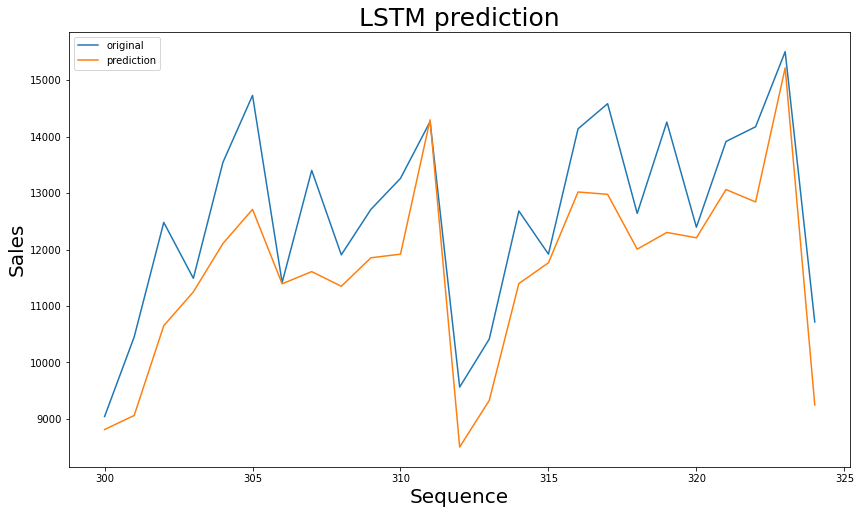

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('LSTM prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 14ms/step - loss: 0.0718 - mae: 0.2264


[0.07184211164712906, 0.2264452427625656]